In [1]:
# - legyen egy mérés objektum (osztály, vagy dict) ami minden futásban az egyes elemek idejét méri mert
# kíváncsi vagyok, hogy egy ilyen 5.4 milliós futás esetén mi az ami fogasztja az időt.
# (de ezt ténylg rendesen megírni)

In [2]:
# lehetne csökkenteni úgy a háló dimenzióját, hogy window hosszú visszatekintés helyett
# csak az adott pillanatot nézem, de úgy, hogy az indikátorok között szerepel mindegyiknek
# a hhv, llv(n) érétke is

# így is 3x annyi bemenetem lesz mint ha csak az adott pillanatban mért indikátort venném
# de még így is jóval kevesebb mint ha mindegyiknek a multbeli álapotait is figyelném

# azonkívül ez egyfajta redukcionizmus és még az is lehet hogy segít, javít a modellen

In [3]:
# - megcsinálni, hogy éjjel is fusson amikor nem megy a notebook és utána ki tudjam elemezni az egészet

# - ezáltal több vm-n is tudom majd futtatni különböző beállításokkal


# - ha ez megvan akkor jöhet majd az hogy átteszem kerasba
#   - kérdés hogy gyorsabb lesz-e?
#   - meg tudom csinálni cnnre és ez a lényeg


# kedvenc tutorialom
# https://www.programiz.com/python-programming/package

In [4]:
# koviket kéne megcsinálnom

# a másik, hogy notebookban megcsinálni, hogy még futás elött generáljon má le nekem pár mlp-t és
# számoja ki a hozzá tartoz fitnesst és utána tudjam már eldönteni, hogy melyiket baszom bele a tanításba

# és majd kipróbálni, hogy milyen az amikor egy kurva szarból indulunk és milyen az amikor egy olynból ami
# más szüéletésekor elég jó

In [5]:
# A megviálgosító felismerés

# Az, hogy bár az elején azt gondoltam, hogy simán mintázat felismeréssel meg lehet majd találni azokat a
# ki és belépési pontokat amelyek mentén sikeres kereskedést lehet csinálni - menet küözben lett egy új
# gondolatom.

#  Mi lenne ha a neurális hálónak menet közben mint bemenet visszatáplálnánk, hogy az adott trédben éppen
# mennyire sikeres.

#  Ennek az 1.1 verziója, hogy azt táplálom vissza neki, hogy mennyi idje van nyitva egy adott kereskedés.

#  Ez technikailag azért egy érdkese kihívás, mert az, hogy mennyi ideg van nyitva az nyilván a neurális
# háló kimenetétől és bemenetétől is függ.
# Ezért ez valamilyen for ciklus megoldással kéne, lehetne megvalósítani, tudom most elképzelni (de még
# nem teljesen pontsan) -> ezért ez végig gondolásra vár.

#  A másik megvalósítás amit úgy hívok hogy actor kritik háló vagyis egy másoidik neurális háló az eredeti
# signál fölött/után amely arról dönt egy második bemenet alapján, hogy figyelembe vegye-e a az eredeti
# signál következő vagy ellentétes irányú jelét vagy ne.
#  Tehát ez egy tök független második háló és csak az után kezd el dolgozni, hogy az első a teljes idősorra
# kiszámolta a kimenetet. A második háló bmenete viszont az, hogy van-e nyitva trade, hogy milyen irányú a
# trade és hogy mióta van nyitva, illetve, hogy éppen mekkora nyereség van rajta.
#  Ezek alapján pedig (1) minden időpillanatban el kell döntenie-hogy nyitja vagy zárja, vagy
# (2) csak azt kell eldöntenie, hogy a következő ellentétes irányú signálnál nyitva tartja-e vagy zájra.

In [6]:
# E fenti ötlet nagyon tetszik, de csak akkor kezdek el vele foglalkozni ha már meg van:

# - trend irányú indikátorok binárisra kódolva
# - keras implementáció (sebességmérés szempontjából)
# - éjszakai futtatásra alkalmas program
# - keras 1D/2D/3D CNN

In [7]:
# Egy teljesen másik dolog ami eszembe jutott,

#  Hogy lehetne több kimenete is annak a neurális hálónak aminek most egy kimenetet van és amely alapján a
# vétli és eladási poziciókat határozza meg a trader. Lehetne egy második, sőt harmadik kimenete is ami a
# stop értékét, vagy a pozició méretét határozza meg.

In [8]:
# Egy másik probléma ami csak úgy eszembe jutott.

# Az egész rendszer rohadtul érzékeny a kiinduló neurális hálóra.

# Nos ahogy most csinálom az hogy véletlen szerűen inicializálok egyet és azt randomizálom meg egy nagyon
# picit az első körben (pont ugyan uyg és pont ugyan olyan mértékben mint ahogy az evolució során a később
# iekben is tenni fogom) Nos ez az ami lehet hogy baj, mert így tulajdonképpen a kiinduló populáció is
# elégé homogén azt kell hogy mondjam.

# Lehet, hogy sokkal jobb megoldás lenne, hogy ha ez első iteráicós lépésre inicializálnék több neurális
# hálót akár több ezret is és kiválasztanék belőle azt az egyet ami a legjobb és azt tenném be az evolúcióba

In [9]:
a second háló elképzelés

pédául hogy vegye figyelembe azt, hogy mióta van nyitva egy trade
és azt is hogy mekkora nyereség vagy veszteség van rajta

az első gondolatom az volt, hogy ezt ugyan abba a hálóba kéne berakni
amelyik a signált generálja, méghozzá úgy hogy továbbra is egy szignál
kimenete legyen viszont bemenetként legyen hozzákapcsolva a fent említ
ett két dolog is. Viszont ez egy logikai bukfenc mivel a szignál alapján
generálódik a kereskedési jel, ami alapján azután adodik hogy egy
trade mióta van nyitva amit mint bemenetetet visszacsatolnék
ugyan abba a hálóba mint ami magát a signált adja, ami alapján
generálódik a jel amit visszacsatolok a hálóba.

Szóval végül is ezt egy for looppal meg lehet oldani, de egy logikai
bukfenc és teljes non-sense.

Ugyhogy a következő megoldás mellett döntöttem:

Meghagyom a signált generáló neurális hálót és elő is állítatom vele
a kereskedési jeleket és magát a ki és beszállást is.

De van egy másoidik hálóm is amely a signál hálótól teljesen független.
Ennek a bemenete pedig nem más mint maga a singál (az elöző háló
kimenete) és az, hogy az adott trade mióta van nyitva és éppen aktuálisan
mekkora rajta a nyereseég (vagy veszteség).



SyntaxError: invalid syntax (1979666879.py, line 1)

In [1]:
# Akár hogy is gondolkozom azon, hogyan lehetne visszatáplálni a döntési/tanulási folyamatba azt, hogy a
# trade mióta van nyitva, mindíg az jön ki, hogy ez egy végtelen ciklus.

# Ezért viszont arra gondoltam, hogy az indikátorok jelei azok nem változnak,
# tehát ezeket le lehet generálni (ez már eddig is így volt)
# Változás az, hogy ezeket vagyis az idősort nem egyszerre adom oda a neurális hálónak bemenetként
# hanem egyesével és sorrendben egy for cikluson belül kell kiszámolnom a neurális háló kimeneteté
# amolyan cummulatív modnon, hogy mindíg aktuálisan kiszámolom, hogy ha volt trade-akkor az most
# nyitva van-e és ha igen mióta, és ez lesz a bemenete a neurális hálónak.

# Gyakorlatilag vissza kell lépnem ahoz amivel elkezdtem annó amikor for ciklusban írtam meg Trader
# osztályon belül a kereskedés kiszámolását (a calculate_ff metódusra gondolok)
# Ez igaz, hogy lassú,
# de ennek segítségével meg tudom valósítani azt amit elképzeltem.

# Sajnos ahogy én most látom, a for ciklusra mindenféleképpen szükség van (nem megkerülhető) és
# egyenként (minden időpontra egyenként kell kiszámolnom a neurális háló kimenetetét) ez sem
# megkerülhető - nem adhatom oda a teljes idősort a neurális hálónak.

In [ ]:
van egy python numyp ipynb amiben vannak jó fogások amivel talán gyorsítani tudom a tradert !!

In [ ]:
az egész szir szar amivel most baszódom, hogy a második hálót ami a tradek hoszát figyeli meg legyen

In [ ]:
a python könyvtárban csináltam egy slices ipynb-t a generatoros betöltésre

In [10]:
# ------------------------------------------------------------------------------

!mkdir input
# !unzip archive.zip -d input
# !wget https://raw.githubusercontent.com/JoDeMiro/SACI22/main/Input/eurusd_minute_1000000.csv.gz     # <-- saját project
!wget https://raw.githubusercontent.com/JoDeMiro/SACI2022/main/Input/eurusd_minute_1000000.csv.gz     # <-- másik project
!mv eurusd_minute_1000000.csv.gz ./input/
!cd input
!gzip -f -d ./input/eurusd_minute_1000000.csv.gz
!rm ./input/eurusd_minute.csv
!mv ./input/eurusd_minute_1000000.csv ./input/eurusd_minute.csv

# ------------------------------------------------------------------------------

mkdir: cannot create directory ‘input’: File exists
--2023-02-23 20:51:34--  https://raw.githubusercontent.com/JoDeMiro/SACI2022/main/Input/eurusd_minute_1000000.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12887930 (12M) [application/octet-stream]
Saving to: ‘eurusd_minute_1000000.csv.gz’

eurusd_minute_10000 100%[===================>]  12.29M  --.-KB/s    in 0.08s   

2023-02-23 20:51:35 (157 MB/s) - ‘eurusd_minute_1000000.csv.gz’ saved [12887930/12887930]



In [11]:
# ------------------------------------------------------------------------------

!mkdir temp

!wget https://github.com/JoDeMiro/SACI2022/raw/main/Input/eurusd_minute_close_only.zip

!mv eurusd_minute_close_only.zip ./temp/

!unzip -o ./temp/eurusd_minute_close_only.zip -d ./temp/

# ------------------------------------------------------------------------------

mkdir: cannot create directory ‘temp’: File exists
--2023-02-23 20:51:37--  https://github.com/JoDeMiro/SACI2022/raw/main/Input/eurusd_minute_close_only.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoDeMiro/SACI2022/main/Input/eurusd_minute_close_only.zip [following]
--2023-02-23 20:51:37--  https://raw.githubusercontent.com/JoDeMiro/SACI2022/main/Input/eurusd_minute_close_only.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14528963 (14M) [application/zip]
Saving to: ‘eurusd_minute_close_only.zip’

eurusd_minute_close 100%[===================>]  13.86M  --.-KB/s    in 0.1s    

2023-

In [462]:
import os
import sys
import glob
import keras
import pprint
import sklearn
import ipywidgets
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, Checkbox
from IPython.display import display

from matplotlib.ticker import StrMethodFormatter
from matplotlib import cm

import copy
import time
import talib
import random
import joblib
from sys import maxsize
from datetime import datetime

import importlib

print('Python version:{}'.format(sys.version))
print('Numpy version:{}'.format(np.__version__))
print('Pandas version:{}'.format(pd.__version__))
print('Keras version:{}'.format(keras.__version__))
print('Tensorflow version:{}'.format(tf.__version__))
print('Sci-Kit Learn version:{}'.format(sklearn.__version__))

import logging
log_name = 'SACI_looger_' + datetime.now().strftime('%Y%m%d-%H%M%S') + '.log'

log_formatter = logging.Formatter("%(asctime)s [%(threadName)-12.12s] [%(levelname)-5.5s]  %(message)s")
logger = logging.getLogger('pyApp')

file_handler = logging.FileHandler('{0}'.format(log_name))
file_handler.setFormatter(log_formatter)
logger.addHandler(file_handler)

console_handler = logging.StreamHandler()
console_handler.setFormatter(log_formatter)
logger.addHandler(console_handler)

logger.setLevel(logging.INFO)

a = 'Hello'
logger.info('%s Ez itt info', a)
logger.debug('%s Ez itt debug', a)
logger.warning('%s Ez itt warning', a)
logger.info('Ez itt egy formázott info {0}'.format(a))


2023-02-24 17:25:23,007 [MainThread  ] [INFO ]  Hello Ez itt info
2023-02-24 17:25:23,007 [MainThread  ] [INFO ]  Hello Ez itt info
2023-02-24 17:25:23,007 [MainThread  ] [INFO ]  Hello Ez itt info
2023-02-24 17:25:23,007 [MainThread  ] [INFO ]  Hello Ez itt info
2023-02-24 17:25:23,007 [MainThread  ] [INFO ]  Hello Ez itt info
2023-02-24 17:25:23,007 [MainThread  ] [INFO ]  Hello Ez itt info
2023-02-24 17:25:23,013 [MainThread  ] [WARNI]  Hello Ez itt warning
2023-02-24 17:25:23,013 [MainThread  ] [WARNI]  Hello Ez itt warning
2023-02-24 17:25:23,013 [MainThread  ] [WARNI]  Hello Ez itt warning
2023-02-24 17:25:23,013 [MainThread  ] [WARNI]  Hello Ez itt warning
2023-02-24 17:25:23,013 [MainThread  ] [WARNI]  Hello Ez itt warning
2023-02-24 17:25:23,013 [MainThread  ] [WARNI]  Hello Ez itt warning
2023-02-24 17:25:23,018 [MainThread  ] [INFO ]  Ez itt egy formázott info Hello
2023-02-24 17:25:23,018 [MainThread  ] [INFO ]  Ez itt egy formázott info Hello
2023-02-24 17:25:23,018 [MainT

Python version:3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
Numpy version:1.23.5
Pandas version:1.3.5
Keras version:2.10.0
Tensorflow version:2.10.0
Sci-Kit Learn version:1.0.2


In [466]:
import modules.datareader
from modules.datareader import DataReader

import modules.experiment
from modules.experiment import Experiment

import modules.nn
from modules.nn import NN, KerasMLP

import modules.trader
from modules.trader import Trader

import modules.randomer
from modules.randomer import Randomer

import modules.plotter
from modules.plotter import Plotter


import modules.fuk
from modules.fuk import plot_trade_adv
from modules.fuk import create_animated_mp4
from modules.fuk import save_model_trader_results
from modules.fuk import run_info

importlib.reload(modules.datareader)
importlib.reload(modules.nn)
importlib.reload(modules.fuk)
importlib.reload(modules.trader)
importlib.reload(modules.plotter)
importlib.reload(modules.experiment)


2023-02-24 17:25:30,978 [MainThread  ] [INFO ]  Data Reader modul loaded
2023-02-24 17:25:30,978 [MainThread  ] [INFO ]  Data Reader modul loaded
2023-02-24 17:25:30,978 [MainThread  ] [INFO ]  Data Reader modul loaded
2023-02-24 17:25:30,978 [MainThread  ] [INFO ]  Data Reader modul loaded
2023-02-24 17:25:30,978 [MainThread  ] [INFO ]  Data Reader modul loaded
2023-02-24 17:25:30,978 [MainThread  ] [INFO ]  Data Reader modul loaded
2023-02-24 17:25:30,987 [MainThread  ] [INFO ]  Fuk modul loaded
2023-02-24 17:25:30,987 [MainThread  ] [INFO ]  Fuk modul loaded
2023-02-24 17:25:30,987 [MainThread  ] [INFO ]  Fuk modul loaded
2023-02-24 17:25:30,987 [MainThread  ] [INFO ]  Fuk modul loaded
2023-02-24 17:25:30,987 [MainThread  ] [INFO ]  Fuk modul loaded
2023-02-24 17:25:30,987 [MainThread  ] [INFO ]  Fuk modul loaded
2023-02-24 17:25:30,990 [MainThread  ] [INFO ]  Trader modul loaded
2023-02-24 17:25:30,990 [MainThread  ] [INFO ]  Trader modul loaded
2023-02-24 17:25:30,990 [MainThread 

<module 'modules.experiment' from '/home/ubuntu/SACI2022/modules/experiment.py'>

In [467]:
ROW = 3840000
FROM = 1100000
ROW = 5000000
ROW = 50000
FROM = 0

DIFF_MULTIPLIER = 10
INPUT_MULTIPLIER = 10

WINDOW = 3

# Átírom úgy, hogy a DIff is az Indikátorok köztött legyen hiszen a Roc1 meg a diff az ugyan az nem?

INDICATORS = ['ROC1', 'ROC2', 'ROC3', 'ROC4', 'ROC5', 'RSI14', 'RSI28',
              'MACD',
              'MA50DIS', 'MA100DIS', 'MA200BIN', 'MA200DIS',
              'LIN30', 'LIN50',
              'RSIHL']

INDICATORS = ['ROC1', 'ROC2', 'ROC3', 'ROC10', 'ROC15', 'ROC20', 'ROC30', 'ROC50', 'ROC100', 'ROC150',
              'MACD',
              'MA50DIS', 'MA100DIS', 'MA200BIN', 'MA200DIS',
              'LIN30', 'LIN50',
              'RSIHL']

setup = dict()
setup['INDICATORS'] = INDICATORS
setup['WINDOW'] = WINDOW
setup['DIFF_MULTIPLIER'] = DIFF_MULTIPLIER
setup['INPUT_MULTIPLIER'] = INPUT_MULTIPLIER

data_reader = DataReader(nRowsRead=ROW)
# data_reader.load_with_pandas(path = './input/eurusd_minute.csv')

data_reader.load_with_pandas(path = './temp/56.csv')
data_reader.df = data_reader.df.rename({data_reader.df.columns[0]: 'BC'}, axis=1)
data_reader.df['Date'] = np.arange(0, data_reader.df['BC'].size, 1) # az elötte lévő sorral együtt kel (!)

data_reader.cut(FROM, ROW)
# data_reader.info()
# data_reader.df.info()
# data_reader.create_dummy(1000, 3.0, 1.1, (1700, 1.2))
data_reader.set_target()
# data_reader.show_array_info()

# Depricated ->
# data_reader.create_diff(DIFF_MULTIPLIER)

data_reader.create_input()

data_reader.create_indicators(extended=True, indicators=INDICATORS)

# Depricated ->
# data_reader.remove_price()
data_reader.drop_price()

# visszavágtam float 64-ről 16-ra
data_reader.retard()

# data_reader.normalize_values()       # experiment
# data_reader.normalize_values()       # experiment

data_reader.set_window(WINDOW)
data_reader.create_train_set()
data_reader.create_test_set()


2023-02-24 17:25:31,203 [MainThread  ] [INFO ]  There are 50000 rows and 1 columns
2023-02-24 17:25:31,203 [MainThread  ] [INFO ]  There are 50000 rows and 1 columns
2023-02-24 17:25:31,203 [MainThread  ] [INFO ]  There are 50000 rows and 1 columns
2023-02-24 17:25:31,203 [MainThread  ] [INFO ]  There are 50000 rows and 1 columns
2023-02-24 17:25:31,203 [MainThread  ] [INFO ]  There are 50000 rows and 1 columns
2023-02-24 17:25:31,203 [MainThread  ] [INFO ]  There are 50000 rows and 1 columns


There are 50000 rows and 1 columns
   1.355499999999999927e+00
0                    1.3555
1                    1.3562
2                    1.3560
3                    1.3563
4                    1.3562
------------------------------------------------------------------------------
(50000, 2)
indcator section
(50000,)
(50000, 1)
float64
float32
------------------------------------------------------------------------------
(50000, 25)
Set window = 3
------------------------------------------------------------------------------
The train x_train 49997, and the labels 49997
(49997, 3, 25) (49997, 1)
float32 float32
x_train.nbytes =  14999.1 Kbyte
x_train.nbytes =  14.9991 Mbyte
(49997, 75)
------------------------------------------------------------------------------
0
50000
create test set section


In [468]:
print(data_reader.array.shape)
print(data_reader.array.dtype)  # float64
print(data_reader.target.shape)

print(data_reader.x_train.dtype)
print(data_reader.y_train.dtype)

print(data_reader.x_train.nbytes // 1024**2)  # 1430 Mb
print(data_reader.y_train.nbytes // 1024**2)  # 19 Mb, azt túl lehet élni (de törölhető is)

(50000, 1)
float64
(50000, 1)
float32
float32
14
0


In [469]:
'''
a data_reader objektumban az input az a beengedett adatok hosszával azonos 1D tömb

a data_raeder.x_train viszont pont annyiszoroa amilyen hosszú a window

a data_reader.target tulajdonképpen a df['BC'].values


target
array
(kellenek ezek?)

használom a targetet még valahol?????
'''

data_reader.__dict__

data_reader.__dict__.keys()

for i in data_reader.__dict__.keys():
    # print(i, '\t= ', getsizeof(data_reader.__dict__[i]))
    print('{} \t = {:.3f} Mb'.format(i, getsizeof(data_reader.__dict__[i]) / 1024**2))

def  calc_data_reader_size(data_reader):
    for i in data_reader.__dict__.keys():
        # print(i, '\t= ', getsizeof(data_reader.__dict__[i]))
        print('{} \t = {:.3f} Mb'.format(i, getsizeof(data_reader.__dict__[i]) / 1024**2))

nRowsRead 	 = 0.000 Mb
window 	 = 0.000 Mb
float_type 	 = 0.000 Mb
df 	 = 0.763 Mb
n_row 	 = 0.000 Mb
n_col 	 = 0.000 Mb
start 	 = 0.000 Mb
end 	 = 0.000 Mb
target 	 = 0.763 Mb
array 	 = 0.000 Mb
x_train 	 = 14.304 Mb
y_train 	 = 0.191 Mb


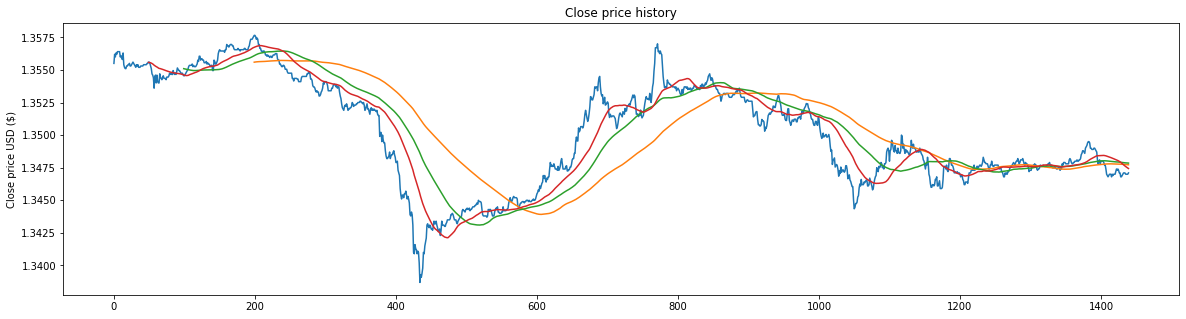

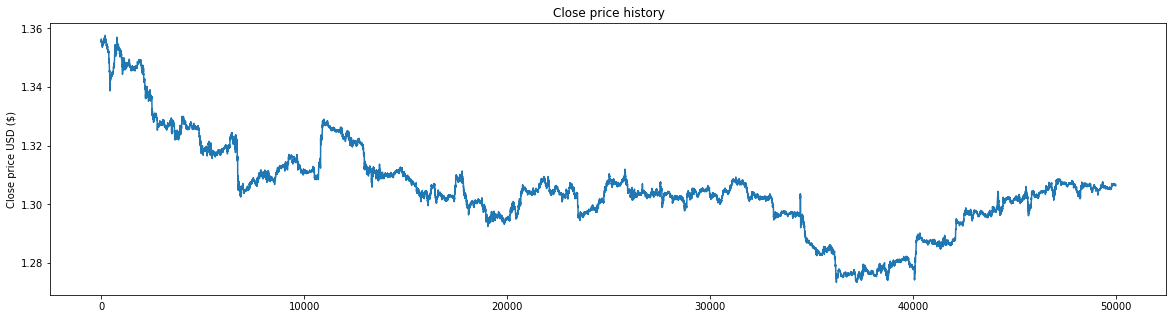

AttributeError: 'DataReader' object has no attribute 'input'

<Figure size 1440x288 with 0 Axes>

In [470]:
_200 = talib.MA(data_reader.array[:, 0], timeperiod=200)
_100 = talib.MA(data_reader.array[:, 0], timeperiod=100)
_50  = talib.MA(data_reader.array[:, 0], timeperiod=50)

_ig = 1440

plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.array[:_ig])
plt.plot(_200[:_ig])
plt.plot(_100[:_ig])
plt.plot(_50[:_ig])
plt.ylabel('Close price USD ($)')
plt.show()

plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.array)
plt.ylabel('Close price USD ($)')
plt.show()


# Mivel törlöm a data_reader.input változót (takarékosságból)
# ezért ez most nem működik

for i in range(1):                                # csak az első
# for i in range(data_reader.input.shape[-1]):    # az összes
    plt.figure(figsize=(20, 4))
    plt.plot(data_reader.input[:, i])

In [ ]:
print(getsizeof(data_reader.x_train))
print(getsizeof(data_reader.x_train) / 1024)
print(getsizeof(data_reader.x_train) / 1024**2)

In [ ]:
print(getsizeof(data_reader.y_train))
print(getsizeof(data_reader.y_train) / 1024)
print(getsizeof(data_reader.y_train) / 1024**2)

    1440 perc egy nap -> 14400 perc -> 10 nap 28800 -> 20 nap
    
    szóval 28K az még mindíg csak 20 nap az nem olyan sok, de még ezen sem tudom ránevelni, hogy rásimuljon

In [471]:
class DR():
    
    def __init__(self):
        
        self.array = np.arange(1, 123456, 1)

class ML():
    
    def __init__(self, dr: DR):
        
        self.dr = dr

dr = DR()

print(id(dr))
print(id(dr.array))

ml1 = ML(dr)
ml2 = ML(dr)

print(id(ml1))
print(id(ml2))

print(id(ml1.dr))        # --> ugyan az az id
print(id(ml2.dr))        # --> ugyan az az id tehát ugyan arra a dr-re mutatnak

print(id(ml1.dr.array))  # --> itt is ugyan az az id
print(id(ml2.dr.array))  # --> itt is ugyan az az id tehát ugyan arra a np.ndarray-re mutatnak



140560804444960
140562649582352
140560690676208
140559030929632
140560804444960
140560804444960
140562649582352
140562649582352


In [472]:
nn1 = NN(x_train = data_reader.x_train, y_train = data_reader.y_train)
nn1.init_nn(_first = FIRST, _second = SECOND, activation='tanh')

nn2 = NN(x_train = data_reader.x_train, y_train = data_reader.y_train)
nn2.init_nn(_first = FIRST, _second = SECOND, activation='tanh')

nn3 = NN(x_train = data_reader.x_train, y_train = data_reader.y_train)
nn3.init_nn(_first = FIRST, _second = SECOND, activation='tanh')


print(id(nn1))
print(id(nn2))
print(id(nn3))

print(id(nn1.x_train))
print(id(nn2.x_train))
print(id(nn3.x_train))

print((nn1.x_train[0][0]))
print((nn2.x_train[0][0]))
print((nn3.x_train[0][0]))

nn1.x_train[0][0] = 0.1

print((nn1.x_train[0][0]))
print((nn2.x_train[0][0]))
print((nn3.x_train[0][0]))

# megállapítottam, hogy minden kétséget kizáróan tök mindegy, hgoy hányszor példányosítok az NN
# osztályból minden egyedben az x_train ugyan arra az objektura fog mutatni és nem töbszörösíti


_________________WAU___________________
_________________WAU___________________
_________________WAU___________________
140559036651360
140559041439824
140559044083472
140558998079696
140558998079696
140558998079696
0.05164146
0.05164146
0.05164146
0.1
0.1
0.1


In [491]:

FIRST = 15
SECOND = 5

# ------------------------------------------------------------------------------

# Scikit
nn = NN(x_train = data_reader.x_train, y_train = data_reader.y_train)
nn.init_nn(_first = FIRST, _second = SECOND, activation='tanh')

# nn.mlp.coefs_                                                                     # <-- ha debuggolni kell

# ------------------------------------------------------------------------------

# Keras
kn = KerasMLP(x_train = data_reader.x_train, y_train = data_reader.y_train)
kn.init_nn(_first = FIRST, _second = SECOND, activation='tanh')

# kn.mlp.get_weights()                                                              # <-- ha debuggolni kell

# ------------------------------------------------------------------------------

_ = nn.knn_to_snn(kn)



_________________WAU___________________


In [492]:
# Lehet (?) hogy a Trader osztályban van a hiba nem az NN-ben?

trader1 = Trader(threshold=0, data_reader=data_reader,trade_cost=TRADE_COST, th=TH)
trader2 = Trader(threshold=0, data_reader=data_reader,trade_cost=TRADE_COST, th=TH)

print(id(trader1))
print(id(trader2))

print(id(trader1.data_reader))        # Ezek ugyan arra a data_reader obj. mutatnak
print(id(trader2.data_reader))        # Ezek ugyan arra a data_reader obj. mutatnak

print(id(trader1.data_reader.x_train))    # Ezek ugyan arra a tömbre mutatnak
print(id(trader2.data_reader.x_train))    # Ezek ugyan arra a tömbre mutatnak



2023-02-24 17:28:06,713 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,713 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,713 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,713 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,713 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,713 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,718 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,718 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,718 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,718 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,718 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:06,718 [MainThread  ] [INFO ]  __init__ Trader


140559011996816
140560721251776
140562235000288
140562235000288
140558998079696
140558998079696


In [493]:
for i in trader1.__dict__.keys():
    # print(i, '\t= ', getsizeof(data_reader.__dict__[i]))
    print('{} \t = {:.3f} Mb'.format(i, getsizeof(trader1.__dict__[i]) / 1024**2))

threshold 	 = 0.000 Mb
th_up 	 = 0.000 Mb
th_dn 	 = 0.000 Mb
data_reader 	 = 0.000 Mb
window 	 = 0.000 Mb
debug 	 = 0.000 Mb
trade_cost 	 = 0.000 Mb
t1 	 = 0.000 Mb
t2 	 = 0.000 Mb
ex 	 = 0.000 Mb
signal 	 = 0.000 Mb
result 	 = 0.000 Mb
hossz 	 = 0.000 Mb


2023-02-24 17:28:09,286 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:09,286 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:09,286 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:09,286 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:09,286 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 17:28:09,286 [MainThread  ] [INFO ]  __init__ Trader


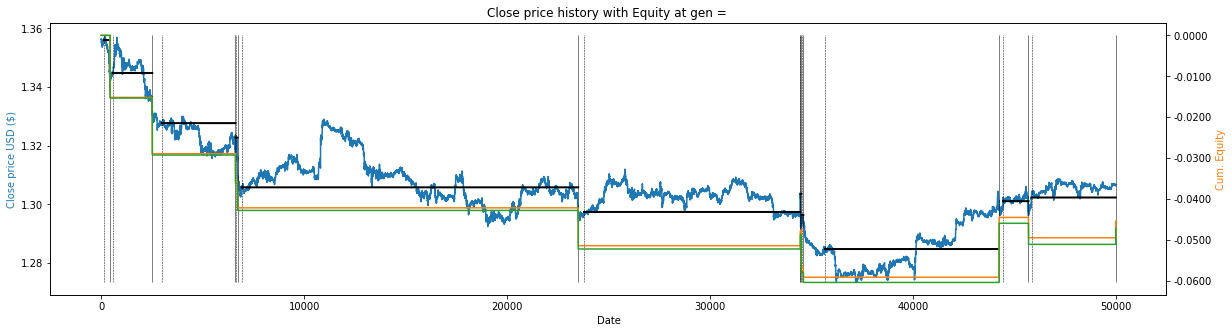

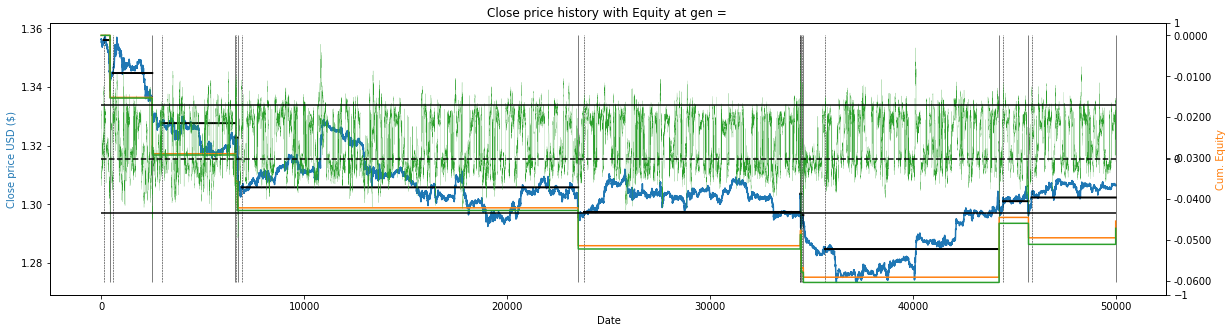

{'buy_count': 11, 'sell_count': 11, 'gain': -0.047119849929809575}


In [494]:
TRADE_COST = 0.0005                  # jelenleg a minimális költég 5x adtam az igazinak -> erős
TRADE_COST = 0.000160
MINIMALMOV = 0.000010
MINTPROFIT = 0.000160
DYNASPREAD = 0.000080                # a spread a minimal movenak a 8x
THRESHOLD = 0.0
TH = 1.065
TH = 0.4

trader = Trader(threshold=THRESHOLD,
                data_reader=data_reader,
                trade_cost=TRADE_COST,
                th=TH)


pred = nn.create_prediction()
result = trader.calculator_np(pred)

plot_trade_adv(trader, window=trader.window)
plot_trade_adv(trader, trader_signal=pred, window=trader.window)

print(result)
# trader.result



In [495]:
_ = data_reader.y_train.size // 1440
print('nap =', _)
print('trade/nap =', result['buy_count'] / _)

nap = 34
trade/nap = 0.3235294117647059


In [501]:
# new

# Itt most azt fogm megcsinálni, hogy még mielőtt elindítom a tanítást,
# inicializáljon több mondjuk 10 különböző neurális hálót
# mindegyiken mérje meg a telesítményt
# rendezzük őket a teljesítmény alapján sorba
# válaszuk ki a legjobbat
# azon kezdjük el a tanítást

FIRST = 15
SECOND = 5

def init_selection(n = 3):
    
    results = []
    
    for i in range(n):
        
        # inicializálja a hálót
        nn = NN(x_train = data_reader.x_train, y_train = data_reader.y_train)
        nn.init_nn(_first = FIRST, _second = SECOND, activation='tanh')
        
        # Keras
        kn.init_nn(_first = FIRST, _second = SECOND, activation='tanh', random_seed=i)
        
        # Debug
        # print(kn.mlp.get_weights()[1])
        
        # forgassuk át scikitbe
        _ = nn.knn_to_snn(kn)
        
        # mérje meg a teljesítményt
        pred = nn.create_prediction()
        result = trader.calculator_np(pred)
        print(result)
        
        results.append((result['gain'], {'gain': result['gain'], '_result': result, 'nn': nn}))
        
    # rendezük őket a teljesítmény alapján
    results.sort(reverse=True)

    return results


In [502]:
res = init_selection(10)

_________________WAU___________________
{'buy_count': 94, 'sell_count': 94, 'gain': -0.027380188026428234}
_________________WAU___________________
{'buy_count': 329, 'sell_count': 329, 'gain': -0.09012977184295658}
_________________WAU___________________
{'buy_count': 100, 'sell_count': 100, 'gain': -0.05466970539093019}
_________________WAU___________________
{'buy_count': 372, 'sell_count': 372, 'gain': -0.0922390160751343}
_________________WAU___________________
{'buy_count': 731, 'sell_count': 731, 'gain': -0.14810867210388184}
_________________WAU___________________
{'buy_count': 439, 'sell_count': 439, 'gain': -0.1089995891952515}
_________________WAU___________________
{'buy_count': 12, 'sell_count': 12, 'gain': -0.05392004577636718}
_________________WAU___________________
{'buy_count': 0, 'sell_count': 0, 'gain': 0.0}
_________________WAU___________________
{'buy_count': 22, 'sell_count': 22, 'gain': -0.005190241355896}
_________________WAU___________________
{'buy_count': 17, 

In [505]:
res[0]

(0.0,
 {'gain': 0.0,
  '_result': {'buy_count': 0, 'sell_count': 0, 'gain': 0.0},
  'nn': <modules.nn.NN at 0x7fd670f35250>})

In [506]:
res[0][1]

{'gain': 0.0,
 '_result': {'buy_count': 0, 'sell_count': 0, 'gain': 0.0},
 'nn': <modules.nn.NN at 0x7fd670f35250>}

In [507]:
res[0][1]['nn']

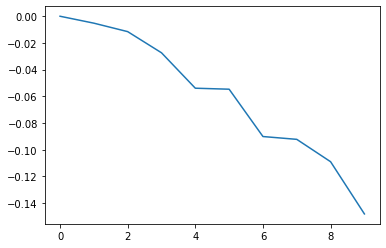

In [511]:
gains = [res[x][0] for x in range(10)]

plt.plot(gains)

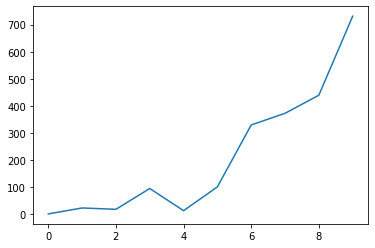

In [520]:
res[2][1]['_result']['buy_count']

buy_count = [res[i][1]['_result']['buy_count'] for i in range(10)]

plt.plot(buy_count)

In [526]:
for i in range(len(res)):
    print(i, res[i][1]['_result'])

0 {'buy_count': 0, 'sell_count': 0, 'gain': 0.0}
1 {'buy_count': 22, 'sell_count': 22, 'gain': -0.005190241355896}
2 {'buy_count': 17, 'sell_count': 17, 'gain': -0.01152980491638184}
3 {'buy_count': 94, 'sell_count': 94, 'gain': -0.027380188026428234}
4 {'buy_count': 12, 'sell_count': 12, 'gain': -0.05392004577636718}
5 {'buy_count': 100, 'sell_count': 100, 'gain': -0.05466970539093019}
6 {'buy_count': 329, 'sell_count': 329, 'gain': -0.09012977184295658}
7 {'buy_count': 372, 'sell_count': 372, 'gain': -0.0922390160751343}
8 {'buy_count': 439, 'sell_count': 439, 'gain': -0.1089995891952515}
9 {'buy_count': 731, 'sell_count': 731, 'gain': -0.14810867210388184}


In [530]:
SELECTED = 9

nn.mlp = copy.deepcopy(res[SELECTED][1]['nn'])


In [ ]:
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

In [358]:
nn.mlp.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 987654321,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (15, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 1e-10,
 'max_fun': 1,
 'max_iter': 1,
 'momentum': 0.0,
 'n_iter_no_change': 1,
 'nesterovs_momentum': False,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': False,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.0,
 'verbose': False,
 'warm_start': False}

In [359]:
ex = Experiment(data_reader, nn)

2023-02-24 15:22:52,193 [MainThread  ] [INFO ]  __init__ Experiment
2023-02-24 15:22:52,193 [MainThread  ] [INFO ]  __init__ Experiment
2023-02-24 15:22:52,193 [MainThread  ] [INFO ]  __init__ Experiment
2023-02-24 15:22:52,193 [MainThread  ] [INFO ]  __init__ Experiment


In [360]:

conf = dict()
conf['TRADE_COST'] = 0.000160 # 0.0005
conf['THRESHOLD']  = 0.0
conf['TH']         = 0.4

conf['internal_plotting'] = False
conf['repeatable']        = True
conf['re_learn']          = False
conf['save_interval']     = 10000

conf['generation']        = 100
conf['population']        = 20
conf['factor_weight']     = 0         # nem is használom ha _variable_
conf['factor_intercept']  = 0         # nem is használom ha _variable_
conf['variable_factor']   = True
conf['factor_min']        = 1         # 0.1   _minnél kisebb annál radikálisabban változtat a súlyon (átirn)
conf['factor_max']        = 200       # 15    _minnél nagyobb annál kevésbé változtat a súlyon
conf['keep_best']         = True
conf['select_ratio_weight']   = 1
conf['select_ratio_bias']     = 1
conf['variable_select_ratio'] = True
conf['select_ratio_min']      = 0.1     # 0.1
conf['select_ratio_max']      = 0.2     # 0.9

conf['setup'] = setup

ex.exp(conf)

create_animated_mp4('price*.png', framerate=1, quite=True)


2023-02-24 15:23:08,703 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 15:23:08,703 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 15:23:08,703 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 15:23:08,703 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 15:23:08,713 [MainThread  ] [INFO ]  ---------- Exp -----------
2023-02-24 15:23:08,713 [MainThread  ] [INFO ]  ---------- Exp -----------
2023-02-24 15:23:08,713 [MainThread  ] [INFO ]  ---------- Exp -----------
2023-02-24 15:23:08,713 [MainThread  ] [INFO ]  ---------- Exp -----------
2023-02-24 15:23:08,717 [MainThread  ] [INFO ]  --------------------------
2023-02-24 15:23:08,717 [MainThread  ] [INFO ]  --------------------------
2023-02-24 15:23:08,717 [MainThread  ] [INFO ]  --------------------------
2023-02-24 15:23:08,717 [MainThread  ] [INFO ]  --------------------------


Output()

2023-02-24 15:23:08,732 [MainThread  ] [INFO ]  Generation: 0
2023-02-24 15:23:08,732 [MainThread  ] [INFO ]  Generation: 0
2023-02-24 15:23:08,732 [MainThread  ] [INFO ]  Generation: 0
2023-02-24 15:23:08,732 [MainThread  ] [INFO ]  Generation: 0
2023-02-24 15:23:08,809 [MainThread  ] [INFO ]  new best_solution find individual = 0
2023-02-24 15:23:08,809 [MainThread  ] [INFO ]  new best_solution find individual = 0
2023-02-24 15:23:08,809 [MainThread  ] [INFO ]  new best_solution find individual = 0
2023-02-24 15:23:08,809 [MainThread  ] [INFO ]  new best_solution find individual = 0
2023-02-24 15:23:08,812 [MainThread  ] [INFO ]  i = 0, j = 0, score = -0.1564610364913941
2023-02-24 15:23:08,812 [MainThread  ] [INFO ]  i = 0, j = 0, score = -0.1564610364913941
2023-02-24 15:23:08,812 [MainThread  ] [INFO ]  i = 0, j = 0, score = -0.1564610364913941
2023-02-24 15:23:08,812 [MainThread  ] [INFO ]  i = 0, j = 0, score = -0.1564610364913941
2023-02-24 15:23:08,885 [MainThread  ] [INFO ]  

2023-02-24 15:23:09,783 [MainThread  ] [INFO ]  (array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  52,  53,
        54,  55,  56,  58,  59,  60,  61,  63,  65,  66,  67,  69,  70,
        72,  73,  74,  76,  79,  81,  83,  84,  85,  89,  92,  93,  95,
        96,  97,  98, 100, 104, 105, 106, 107, 108, 109, 111, 114, 115,
       123, 125, 126, 129, 130, 131, 133, 136, 140, 144, 148, 149, 150,
       152, 155, 158, 160, 161, 162, 163, 164, 165, 167, 170, 177, 182,
       185, 189, 193, 198, 207, 214, 216, 217, 218, 220, 223, 225, 230,
       234, 237, 250, 263, 268, 269, 271, 293, 295, 305, 310, 322, 326,
       350, 421, 746]), array([249, 108,  70,  51,  35,  17,  21,  30,  16,  11,  10,  15,  10,
        11,  11,   6,   5,  10,   6,   4,   8,   5,   6,   6,  

2023-02-24 15:23:17,246 [MainThread  ] [INFO ]  i = 8, j = 12, score = 0.0010200055694579973
2023-02-24 15:23:17,589 [MainThread  ] [INFO ]  best_score in generation i = 8 = 0.0010200055694579973
2023-02-24 15:23:17,589 [MainThread  ] [INFO ]  best_score in generation i = 8 = 0.0010200055694579973
2023-02-24 15:23:17,589 [MainThread  ] [INFO ]  best_score in generation i = 8 = 0.0010200055694579973
2023-02-24 15:23:17,589 [MainThread  ] [INFO ]  best_score in generation i = 8 = 0.0010200055694579973
2023-02-24 15:23:17,742 [MainThread  ] [INFO ]  new best_solution find individual = 3
2023-02-24 15:23:17,742 [MainThread  ] [INFO ]  new best_solution find individual = 3
2023-02-24 15:23:17,742 [MainThread  ] [INFO ]  new best_solution find individual = 3
2023-02-24 15:23:17,742 [MainThread  ] [INFO ]  new best_solution find individual = 3
2023-02-24 15:23:17,744 [MainThread  ] [INFO ]  i = 9, j = 3, score = 0.0021601020812988176
2023-02-24 15:23:17,744 [MainThread  ] [INFO ]  i = 9, j = 

2023-02-24 15:23:22,701 [MainThread  ] [INFO ]  i = 14, j = 12, score = 0.011730094375610348
2023-02-24 15:23:22,701 [MainThread  ] [INFO ]  i = 14, j = 12, score = 0.011730094375610348
2023-02-24 15:23:22,701 [MainThread  ] [INFO ]  i = 14, j = 12, score = 0.011730094375610348
2023-02-24 15:23:22,701 [MainThread  ] [INFO ]  i = 14, j = 12, score = 0.011730094375610348
2023-02-24 15:23:22,786 [MainThread  ] [INFO ]  new best_solution find individual = 14
2023-02-24 15:23:22,786 [MainThread  ] [INFO ]  new best_solution find individual = 14
2023-02-24 15:23:22,786 [MainThread  ] [INFO ]  new best_solution find individual = 14
2023-02-24 15:23:22,786 [MainThread  ] [INFO ]  new best_solution find individual = 14
2023-02-24 15:23:22,789 [MainThread  ] [INFO ]  i = 14, j = 14, score = 0.011750058135986324
2023-02-24 15:23:22,789 [MainThread  ] [INFO ]  i = 14, j = 14, score = 0.011750058135986324
2023-02-24 15:23:22,789 [MainThread  ] [INFO ]  i = 14, j = 14, score = 0.011750058135986324
2

2023-02-24 15:23:26,931 [MainThread  ] [INFO ]  i = 18, j = 16, score = 0.018729656372070306
2023-02-24 15:23:26,931 [MainThread  ] [INFO ]  i = 18, j = 16, score = 0.018729656372070306
2023-02-24 15:23:27,051 [MainThread  ] [INFO ]  best_score in generation i = 18 = 0.018729656372070306
2023-02-24 15:23:27,051 [MainThread  ] [INFO ]  best_score in generation i = 18 = 0.018729656372070306
2023-02-24 15:23:27,051 [MainThread  ] [INFO ]  best_score in generation i = 18 = 0.018729656372070306
2023-02-24 15:23:27,051 [MainThread  ] [INFO ]  best_score in generation i = 18 = 0.018729656372070306
2023-02-24 15:23:27,253 [MainThread  ] [INFO ]  new best_solution find individual = 4
2023-02-24 15:23:27,253 [MainThread  ] [INFO ]  new best_solution find individual = 4
2023-02-24 15:23:27,253 [MainThread  ] [INFO ]  new best_solution find individual = 4
2023-02-24 15:23:27,253 [MainThread  ] [INFO ]  new best_solution find individual = 4
2023-02-24 15:23:27,256 [MainThread  ] [INFO ]  i = 19, j 

2023-02-24 15:23:48,726 [MainThread  ] [INFO ]  i = 42, j = 17, score = 0.02079962760925292
2023-02-24 15:23:48,726 [MainThread  ] [INFO ]  i = 42, j = 17, score = 0.02079962760925292
2023-02-24 15:23:48,815 [MainThread  ] [INFO ]  best_score in generation i = 42 = 0.02079962760925292
2023-02-24 15:23:48,815 [MainThread  ] [INFO ]  best_score in generation i = 42 = 0.02079962760925292
2023-02-24 15:23:48,815 [MainThread  ] [INFO ]  best_score in generation i = 42 = 0.02079962760925292
2023-02-24 15:23:48,815 [MainThread  ] [INFO ]  best_score in generation i = 42 = 0.02079962760925292
2023-02-24 15:23:50,331 [MainThread  ] [INFO ]  new best_solution find individual = 16
2023-02-24 15:23:50,331 [MainThread  ] [INFO ]  new best_solution find individual = 16
2023-02-24 15:23:50,331 [MainThread  ] [INFO ]  new best_solution find individual = 16
2023-02-24 15:23:50,331 [MainThread  ] [INFO ]  new best_solution find individual = 16
2023-02-24 15:23:50,339 [MainThread  ] [INFO ]  i = 44, j = 

2023-02-24 15:24:39,867 [MainThread  ] [INFO ]  
	 {'buy_count': 23, 'sell_count': 23, 'gain': 0.021909585304260244}
2023-02-24 15:24:39,867 [MainThread  ] [INFO ]  
	 {'buy_count': 23, 'sell_count': 23, 'gain': 0.021909585304260244}
2023-02-24 15:24:39,867 [MainThread  ] [INFO ]  
	 {'buy_count': 23, 'sell_count': 23, 'gain': 0.021909585304260244}
2023-02-24 15:24:39,867 [MainThread  ] [INFO ]  
	 {'buy_count': 23, 'sell_count': 23, 'gain': 0.021909585304260244}
2023-02-24 15:24:39,871 [MainThread  ] [INFO ]  
experiment (takes) running_time = 91.15

2023-02-24 15:24:39,871 [MainThread  ] [INFO ]  
experiment (takes) running_time = 91.15

2023-02-24 15:24:39,871 [MainThread  ] [INFO ]  
experiment (takes) running_time = 91.15

2023-02-24 15:24:39,871 [MainThread  ] [INFO ]  
experiment (takes) running_time = 91.15



skipped


rm: cannot remove 'ani_price.mp4': No such file or directory


In [36]:
# rekorder 0.040

2023-02-24 15:24:43,850 [MainThread  ] [INFO ]  --------------------------
2023-02-24 15:24:43,850 [MainThread  ] [INFO ]  --------------------------
2023-02-24 15:24:43,850 [MainThread  ] [INFO ]  --------------------------
2023-02-24 15:24:43,850 [MainThread  ] [INFO ]  --------------------------
2023-02-24 15:24:43,855 [MainThread  ] [INFO ]  90.8586 sec 	 total time
2023-02-24 15:24:43,855 [MainThread  ] [INFO ]  90.8586 sec 	 total time
2023-02-24 15:24:43,855 [MainThread  ] [INFO ]  90.8586 sec 	 total time
2023-02-24 15:24:43,855 [MainThread  ] [INFO ]  90.8586 sec 	 total time
2023-02-24 15:24:43,859 [MainThread  ] [INFO ]  43.6826 sec 	 mlp pred
2023-02-24 15:24:43,859 [MainThread  ] [INFO ]  43.6826 sec 	 mlp pred
2023-02-24 15:24:43,859 [MainThread  ] [INFO ]  43.6826 sec 	 mlp pred
2023-02-24 15:24:43,859 [MainThread  ] [INFO ]  43.6826 sec 	 mlp pred
2023-02-24 15:24:43,879 [MainThread  ] [INFO ]  0.5693 sec 	 randomer


Directory  NightRuns/20230224-152443  Created 
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
<class 'modules.trader.Trader'>
<class 'list'>
<class 'dict'>
<class 'dict'>



 NightRuns/20230224-152443 



90.8586 sec 	 total time
43.6826 sec 	 mlp pred
0.5693 sec 	 randomer
46.2616 sec 	 trader


2023-02-24 15:24:43,879 [MainThread  ] [INFO ]  0.5693 sec 	 randomer
2023-02-24 15:24:43,879 [MainThread  ] [INFO ]  0.5693 sec 	 randomer
2023-02-24 15:24:43,879 [MainThread  ] [INFO ]  0.5693 sec 	 randomer
2023-02-24 15:24:43,882 [MainThread  ] [INFO ]  46.2616 sec 	 trader
2023-02-24 15:24:43,882 [MainThread  ] [INFO ]  46.2616 sec 	 trader
2023-02-24 15:24:43,882 [MainThread  ] [INFO ]  46.2616 sec 	 trader
2023-02-24 15:24:43,882 [MainThread  ] [INFO ]  46.2616 sec 	 trader


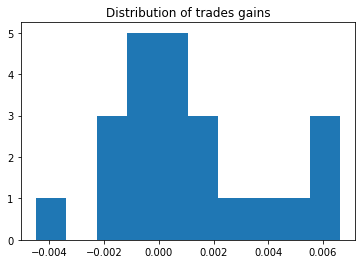

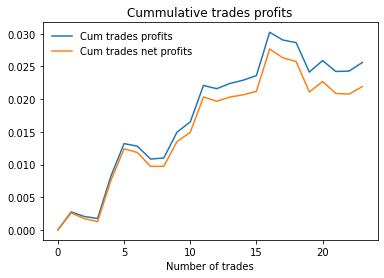

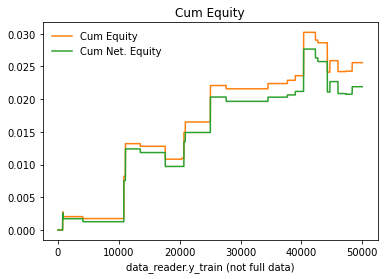

In [361]:
trader = ex.trader
trader.result

# save model
save_model_trader_results(ex)

# shor ex runtime info
run_info(ex)

# create plotter
plotter = Plotter(trader.result)

# plot result
plotter.plot_res(trader)


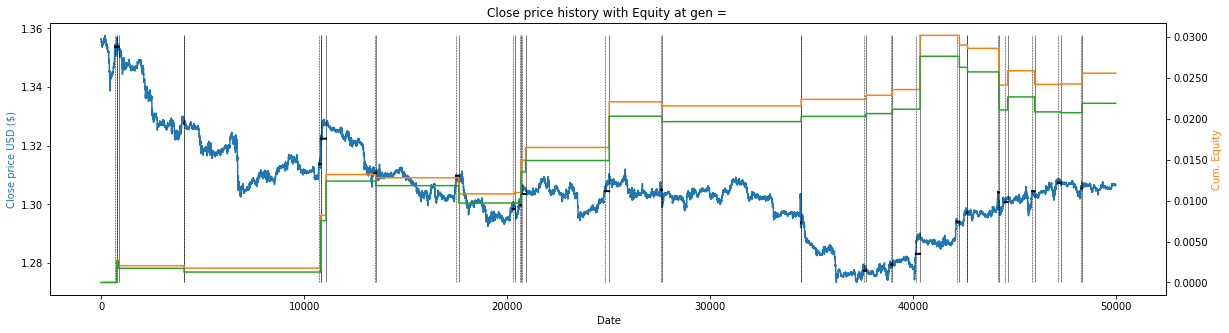

In [362]:

plot_trade_adv(trader, _from=0, _back=0, window=trader.window, step=True)


In [363]:
_from   = IntSlider(min=0, max=1200000, step=1, value=0, description='start')
_back   = IntSlider(min=0, max=1200000, step=1, value=0, description='back')
_window = IntSlider(min=-10, max=trader.window, step=1, value=trader.window, description='window')
_step   = Checkbox(value=True, description='step')
_trd    = fixed(trader)

ui = ipywidgets.HBox([_from, _back, _window, _step])
params = {'trader': _trd, '_from': _from, '_back': _back, 'window': _window, 'step': _step}
out = ipywidgets.interactive_output(plot_trade_adv, params)
display(ui, out)

Output()

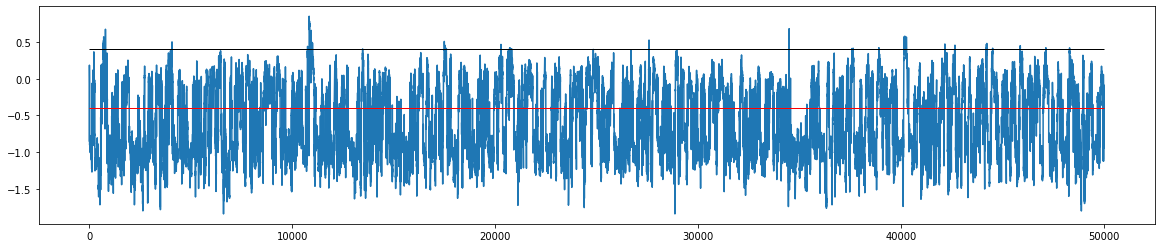

In [364]:
# ToDo: ezt bebaszni a plotter osztályba (signál és a thresholdok)

plt.figure(figsize=(20, 4))
plt.plot(ex.test_pred)
_x_max = ex.test_pred.shape[0]
plt.hlines(trader.th_dn, 0, _x_max, lw=1.0, color='red')
plt.hlines(trader.th_up, 0, _x_max, lw=1.0, color='black')
# print(np.argwhere(ex.test_pred > ex.trader.th_up))
plt.show()

In [365]:
start = IntSlider(min=0, max=12000, step=1, value=0, description='start')
end   = IntSlider(min=-14000, max=-1, step=1, value=1, description='end')

p     = Checkbox(description='predicted', value=True)
i     = Checkbox(description='initial', value=True)

e     = fixed(ex)

params = {'ex': e, 'start': start, 'end': end, 'p': p, 'i': i}

ui = ipywidgets.HBox([start, end, p, i])
out = ipywidgets.interactive_output(plotter.plot_int, params)
display(ui, out)


Output()

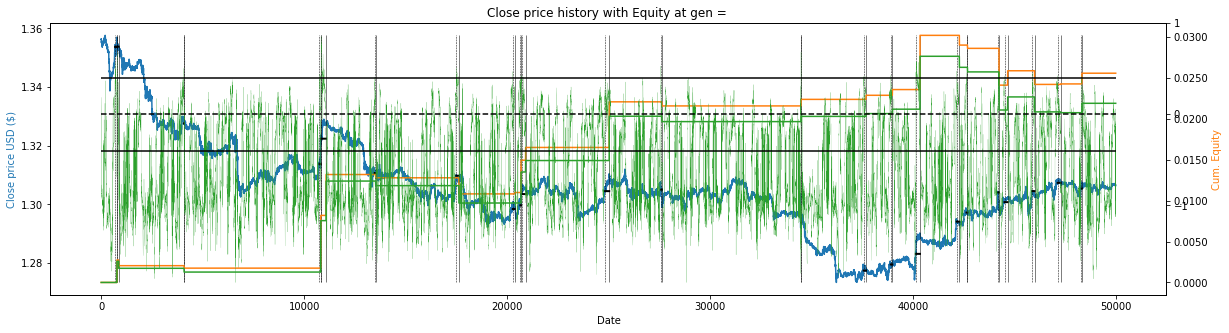

In [366]:
plot_trade_adv(trader, trader_signal=ex.test_pred, window=trader.window, _from=0, _back=0)

## Visualise net - Best Solution

[75 15  5  1]


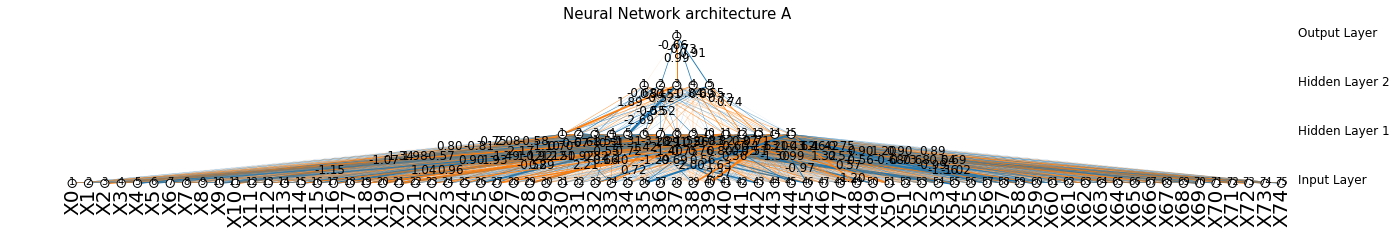

In [367]:
plotter.vshow(ex.result['best_generation_solution'])

## Visualise net - Initial ('Empty') Solution

[75 15  5  1]


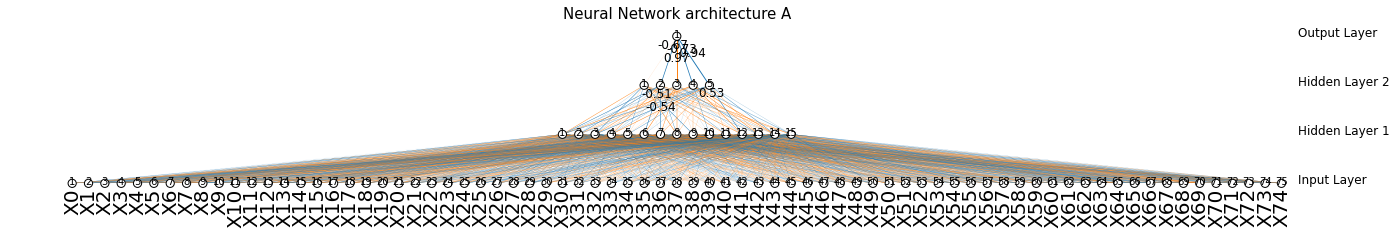

In [368]:
plotter.vshow(ex.attach['backup_mlp'])


```
# JoDeMiro
```


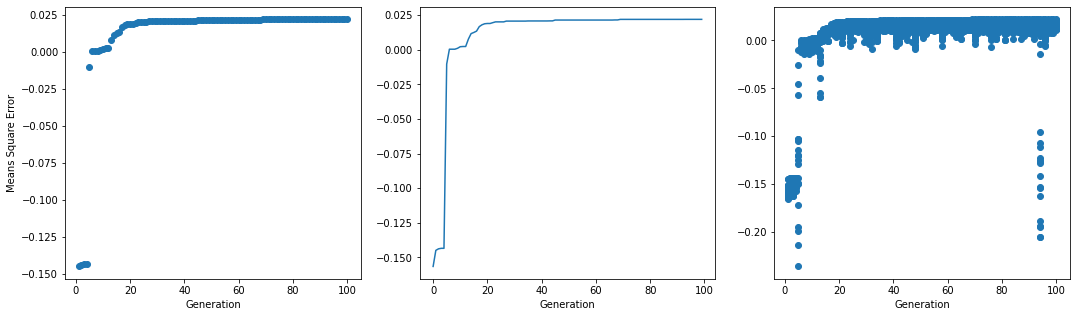

In [369]:
plotter = Plotter(ex.result)

plotter.plot_results(2000, True)

In [370]:
_max = IntSlider(min=40, max=800, step=1, value=120)

interact(plotter.plot_results, _max=_max, _show_mid=True, _show_avg=True);

interactive(children=(IntSlider(value=120, description='_max', max=800, min=40), Checkbox(value=True, descript…

In [371]:

# meg van minden -> nézzük meg milyen lépéseket kell tennem ahoz, hogy a test adatokon is lefusson


## Test the model on extended data

Experimental

Sajnos a normalizáció miatt el fog csúszni, ezért az lenne az igazi, hogy ha a normalizációt nem csinálnám meg rajta.

In [373]:



data_reader = DataReader(nRowsRead=435000)                                 # <-- instantiate DataReader (set number of rows for data)

# data_reader.load_with_pandas(path = './input/eurusd_minute.csv')           # <-- read a particular files from disk (return with df, but also set self)


data_reader.load_with_pandas(path = './temp/56.csv')
data_reader.df = data_reader.df.rename({data_reader.df.columns[0]: 'BC'}, axis=1)
data_reader.df['Date'] = np.arange(0, data_reader.df['BC'].size, 1) # az elötte lévő sorral együtt kel (!)


data_reader.cut(0, 2435000)                                                 # <-- cut from to (start, to)

# data_reader.info()                                                       # <-- my own info() function

# data_reader.df.info()                                                    # <-- call pandas built-in info() function

data_reader.set_target()                                                   # <-- prepare is setter convert pandas to numpy and set target variable

# data_reader.show_array_info()

# Depricated ->
# data_reader.create_diff(DIFF_MULTIPLIER)

data_reader.create_input()

data_reader.create_indicators(extended=True, indicators=INDICATORS)

# Depricated ->
# data_reader.remove_price()
data_reader.drop_price()

# visszavágtam float 64-ről 16-ra
data_reader.retard()

# data_reader.normalize_values()       # experiment
# data_reader.normalize_values()       # experiment

data_reader.set_window(ex.data_reader.window)
data_reader.create_train_set()
data_reader.create_test_set()


2023-02-24 15:26:53,889 [MainThread  ] [INFO ]  There are 435000 rows and 1 columns
2023-02-24 15:26:53,889 [MainThread  ] [INFO ]  There are 435000 rows and 1 columns
2023-02-24 15:26:53,889 [MainThread  ] [INFO ]  There are 435000 rows and 1 columns
2023-02-24 15:26:53,889 [MainThread  ] [INFO ]  There are 435000 rows and 1 columns


There are 435000 rows and 1 columns
   1.355499999999999927e+00
0                    1.3555
1                    1.3562
2                    1.3560
3                    1.3563
4                    1.3562
------------------------------------------------------------------------------
(435000, 2)
indcator section
(435000,)
(435000, 1)
float64
float32
------------------------------------------------------------------------------
(435000, 25)
Set window = 3
------------------------------------------------------------------------------
The train x_train 434997, and the labels 434997
(434997, 3, 25) (434997, 1)
float32 float32
x_train.nbytes =  130499.1 Kbyte
x_train.nbytes =  130.4991 Mbyte
(434997, 75)
------------------------------------------------------------------------------
0
2435000
create test set section


In [374]:
conf

{'TRADE_COST': 0.00016,
 'THRESHOLD': 0.0,
 'TH': 0.4,
 'internal_plotting': False,
 'repeatable': True,
 're_learn': False,
 'save_interval': 10000,
 'generation': 100,
 'population': 20,
 'factor_weight': 0,
 'factor_intercept': 0,
 'variable_factor': True,
 'factor_min': 1,
 'factor_max': 200,
 'keep_best': True,
 'select_ratio_weight': 1,
 'select_ratio_bias': 1,
 'variable_select_ratio': True,
 'select_ratio_min': 0.1,
 'select_ratio_max': 0.2,
 'setup': {'INDICATORS': ['ROC1',
   'ROC2',
   'ROC3',
   'ROC10',
   'ROC15',
   'ROC20',
   'ROC30',
   'ROC50',
   'ROC100',
   'ROC150',
   'MACD',
   'MA50DIS',
   'MA100DIS',
   'MA200BIN',
   'MA200DIS',
   'LIN30',
   'LIN50',
   'RSIHL'],
  'WINDOW': 3,
  'DIFF_MULTIPLIER': 10,
  'INPUT_MULTIPLIER': 10}}

In [375]:
calc_data_reader_size(data_reader)

nRowsRead 	 = 0.000 Mb
window 	 = 0.000 Mb
float_type 	 = 0.000 Mb
df 	 = 6.638 Mb
n_row 	 = 0.000 Mb
n_col 	 = 0.000 Mb
start 	 = 0.000 Mb
end 	 = 0.000 Mb
target 	 = 6.638 Mb
array 	 = 0.000 Mb
x_train 	 = 124.454 Mb
y_train 	 = 1.660 Mb


In [376]:

TRADE_COST = conf['TRADE_COST']
THRESHOLD  = conf['THRESHOLD']
TH = conf['TH']

print('TH        ', TH)
print('TRADE_COST', TRADE_COST)

trader = Trader(threshold=THRESHOLD,
                data_reader=data_reader,
                trade_cost=TRADE_COST,
                th=TH,
                debug=False)

2023-02-24 15:29:16,961 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 15:29:16,961 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 15:29:16,961 [MainThread  ] [INFO ]  __init__ Trader
2023-02-24 15:29:16,961 [MainThread  ] [INFO ]  __init__ Trader


TH         0.4
TRADE_COST 0.00016


In [377]:
# A globalisan legjobb megoldás alapján csináljuk meg a becslést
test_pred = ex.result['best_generation_solution'].predict(
    data_reader.x_train)  # <-- kiértékeléshez és vizualizációhoz

# Végül minden esetben updateljük a trader.result-ot azáltal, hogy meghívjuk a következőt
replayed_result = trader.calculator_np(test_pred)

replayed_result

{'buy_count': 186, 'sell_count': 186, 'gain': -0.00443970848083498}

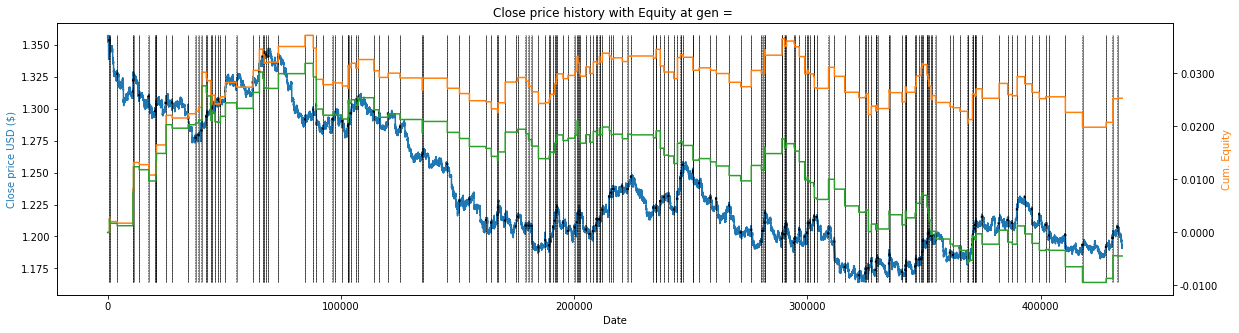

In [382]:

plot_trade_adv(trader, _from=0, _back=0, window=trader.window, step=True)


In [ ]:

plot_trade_adv(trader, trader_signal=test_pred, window=trader.window, _from=0, _back=0)


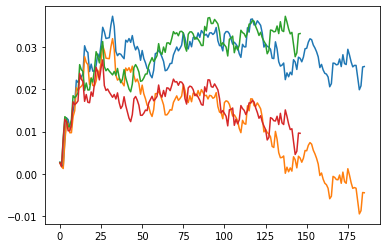

In [383]:
# nincs rajta a kötési költség azért tündököl ilyen szépen

trader.result.keys()
_raw_eq = np.cumsum(trader.result['sell_price']-trader.result['buy_price'])
plt.plot(_raw_eq)

_net_eq = np.cumsum(trader.result['sell_price']-trader.result['buy_price']-trader.trade_cost)
plt.plot(_net_eq)

#leveszem a nagyon rövid tradeket
_min = 30
_raw_eq_min = np.cumsum(trader.result['sell_price'][trader.result['trade_length'] > _min] - 
              trader.result['buy_price'][trader.result['trade_length'] > _min])
plt.plot(_raw_eq_min)

_net_eq_min = np.cumsum(trader.result['sell_price'][trader.result['trade_length'] > _min] - 
              trader.result['buy_price'][trader.result['trade_length'] > _min] - trader.trade_cost)
plt.plot(_net_eq_min)
# sajnos a rövid tradek adnak sok profitot

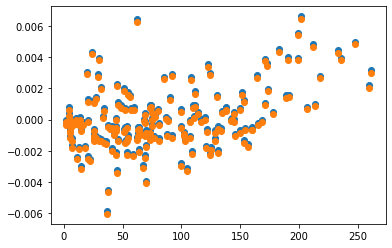

In [384]:
# profit tradenként és tradek hossz aközötti öszfüg

t_raw_prof = trader.result['sell_price'] - trader.result['buy_price']
t_net_prof = trader.result['sell_price'] - trader.result['buy_price'] - trader.trade_cost
tlen  = trader.result['trade_length']
plt.scatter(tlen, t_raw_prof)
plt.scatter(tlen, t_net_prof)

(array([ 1.,  2., 10., 43., 63., 35., 12., 12.,  5.,  3.]),
 array([-0.006060025367736817  , -0.00480702844619751   ,
        -0.0035540315246582036 , -0.0023010346031188973 ,
        -0.0010480376815795904 ,  0.00020495923995971638,
         0.0014579561614990223 ,  0.00271095308303833   ,
         0.003963950004577636  ,  0.005216946926116942  ,
         0.00646994384765625   ]),
 <BarContainer object of 10 artists>)

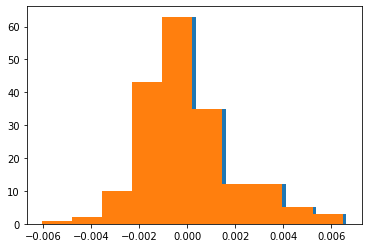

In [385]:
# jó lenne látni a profit eloszlását is

plt.hist(t_raw_prof)
plt.hist(t_net_prof)

(array([[ 0.,  0.,  4., 10., 15.,  5.,  0.,  1.,  1.,  0.],
        [ 1.,  1.,  1.,  9., 11.,  4.,  3.,  2.,  0.,  0.],
        [ 0.,  1.,  3.,  9., 13.,  7.,  1.,  0.,  0.,  1.],
        [ 0.,  0.,  2.,  5.,  5.,  3.,  1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  7.,  7.,  4.,  2.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  3.,  8.,  6.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  4.,  2.,  2.,  2.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  3.,  0.,  2.,  0.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  0.]]),
 array([  2.              ,  27.9             ,  53.8             ,
         79.69999999999999, 105.6             , 131.5             ,
        157.39999999999998, 183.29999999999998, 209.2             ,
        235.1             , 261.              ]),
 array([-0.005900025367736816 , -0.00464702844619751  ,
        -0.003394031524658203 , -0.002141034603118897 ,
        -0.00088803768157959  , 

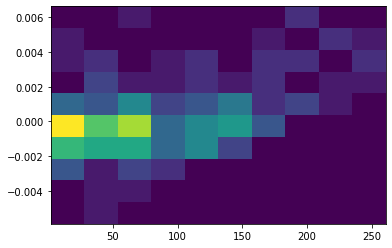

In [386]:
plt.hist2d(tlen, t_raw_prof)

In [ ]:
_avg_trade_lenght = trader.result['trade_length'].mean()
print(f'átlagos trade hossz = {_avg_trade_lenght:0.2f}')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(6.4 * 2, 4))
_ = ax[0].hist(trader.result['trade_length'], bins=320)
_ = trader.result['trade_length']
print('átlagos trade hossz', _.mean())

_ = trader.result['trade_length']
_ = _[_ < 2500]
print('átlagos trade hossz', _.mean())
_ = ax[1].hist(_, bins=320)
plt.show()

In [ ]:
print(f'avg =  {t_raw_prof.mean():.10f}')
print(f'max =  {t_raw_prof.max():.10f}')
print(f'min = {t_raw_prof.min():.10f}')

In [ ]:
import seaborn as sns

sns.jointplot(x=tlen, 
              y=t_net_prof,
              kind='reg');

# plt.title("Scatter Plot with Marginal Histograms: Seaborn", size=18, pad=80)



```
# JoDeMiro
```
